In [617]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [618]:
#Read in the csv file and convert to a Pandas dataframe
houses_train = pd.read_csv("data/train.csv")
houses_test = pd.read_csv("data/test.csv")
sale_price = pd.read_csv("data/sample_submission.csv")

In [619]:
# Merge the test dataset with the target 
houses_test = houses_test.merge(sale_price,on='Id')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [620]:
sale_price.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [621]:
houses_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [622]:
houses_train.shape

(1460, 81)

In [623]:
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [624]:
houses_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [625]:
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [626]:
houses_train.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [628]:
houses_train.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

In [629]:
houses_train["LotFrontage"].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [630]:
houses_train.shape

(1460, 81)

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [632]:
columns_to_drop = ["MiscFeature", "Alley", "Fence"]
houses_train.drop(columns=columns_to_drop, inplace=True)

In [633]:
houses_train['PoolQC'].isnull().sum()

1453

In [634]:
houses_train.drop('PoolQC',axis=1,inplace=True)

In [635]:
houses_train["MasVnrType"].fillna("NA",inplace=True)
houses_train["BsmtExposure"].fillna("NA",inplace=True)
houses_train["FireplaceQu"].fillna("NA",inplace=True)
houses_train["BsmtFinType2"].fillna("NA",inplace=True)
houses_train.fillna(0,inplace=True)
       

C:\Users\ish3e\AppData\Local\Temp\ipykernel_5384\3840104012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houses_train["MasVnrType"].fillna("NA",inplace=True)
C:\Users\ish3e\AppData\Local\Temp\ipykernel_5384\3840104012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

### Correcting errors

-------------------

In [636]:
# Compute Z-scores for the "SalePrice" column
houses_train["p_z_score"] = zscore(houses_train["SalePrice"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('SalePrice').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [637]:
# Compute Z-scores for the "GrLivArea" column
houses_train["p_z_score"] = zscore(houses_train["GrLivArea"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('GrLivArea').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [638]:
# Compute Z-scores for the "TotRmsAbvGrd" column
houses_train["p_z_score"] = zscore(houses_train["TotRmsAbvGrd"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('TotRmsAbvGrd').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [639]:
# Compute Z-scores for the "TotRmsAbvGrd" column
houses_train["p_z_score"] = zscore(houses_train["WoodDeckSF"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs =houses_train[houses_train["p_z_score"].abs() > 4]['WoodDeckSF'].sort_values().index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [640]:
# Compute Z-scores for the "TotRmsAbvGrd" column
houses_train["p_z_score"] = zscore(houses_train["2ndFlrSF"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset


indexs =houses_train[houses_train["p_z_score"].abs() > 4]['2ndFlrSF'].sort_values().index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]



In [641]:
# Compute Z-scores for the "YearRemodAdd" column
houses_train["p_z_score"] = zscore(houses_train["YearRemodAdd"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('YearRemodAdd').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]

In [642]:
# Identify numerical columns
numerical_features = houses_train.select_dtypes(include=['number']).columns.tolist()

# Display the numerical columns
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [643]:
def remove_outliers_zscore(df, numerical_columns, threshold=3):
    filtered_df = df.copy()  # Create a copy to avoid modifying the original dataset
    
    for col in numerical_columns:
        mean = filtered_df[col].mean()
        std = filtered_df[col].std()
        
        # Compute Z-scores
        z_scores = (filtered_df[col] - mean) / std
        
        # Keep only rows where Z-score is within the threshold
        print(col,houses_train.shape[0]-filtered_df[np.abs(z_scores) <= threshold].shape[0])
    
    #return filtered_df

remove_outliers_zscore(houses_train, numerical_features)

Id 0
MSSubClass 27
LotFrontage 4
LotArea 10
OverallQual 11
OverallCond 24
YearBuilt 5
YearRemodAdd 0
MasVnrArea 28
BsmtFinSF1 2
BsmtFinSF2 47
BsmtUnfSF 9
TotalBsmtSF 4
1stFlrSF 8
2ndFlrSF 1
LowQualFinSF 15
GrLivArea 3
BsmtFullBath 13
BsmtHalfBath 78
FullBath 0
HalfBath 10
BedroomAbvGr 10
KitchenAbvGr 60
TotRmsAbvGrd 1
Fireplaces 4
GarageYrBlt 79
GarageCars 4
GarageArea 4
WoodDeckSF 18
OpenPorchSF 26
EnclosedPorch 53
3SsnPorch 23
ScreenPorch 57
PoolArea 3
MiscVal 7
MoSold 0
YrSold 0
SalePrice 20


In [644]:
houses_train.shape

(1406, 77)

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

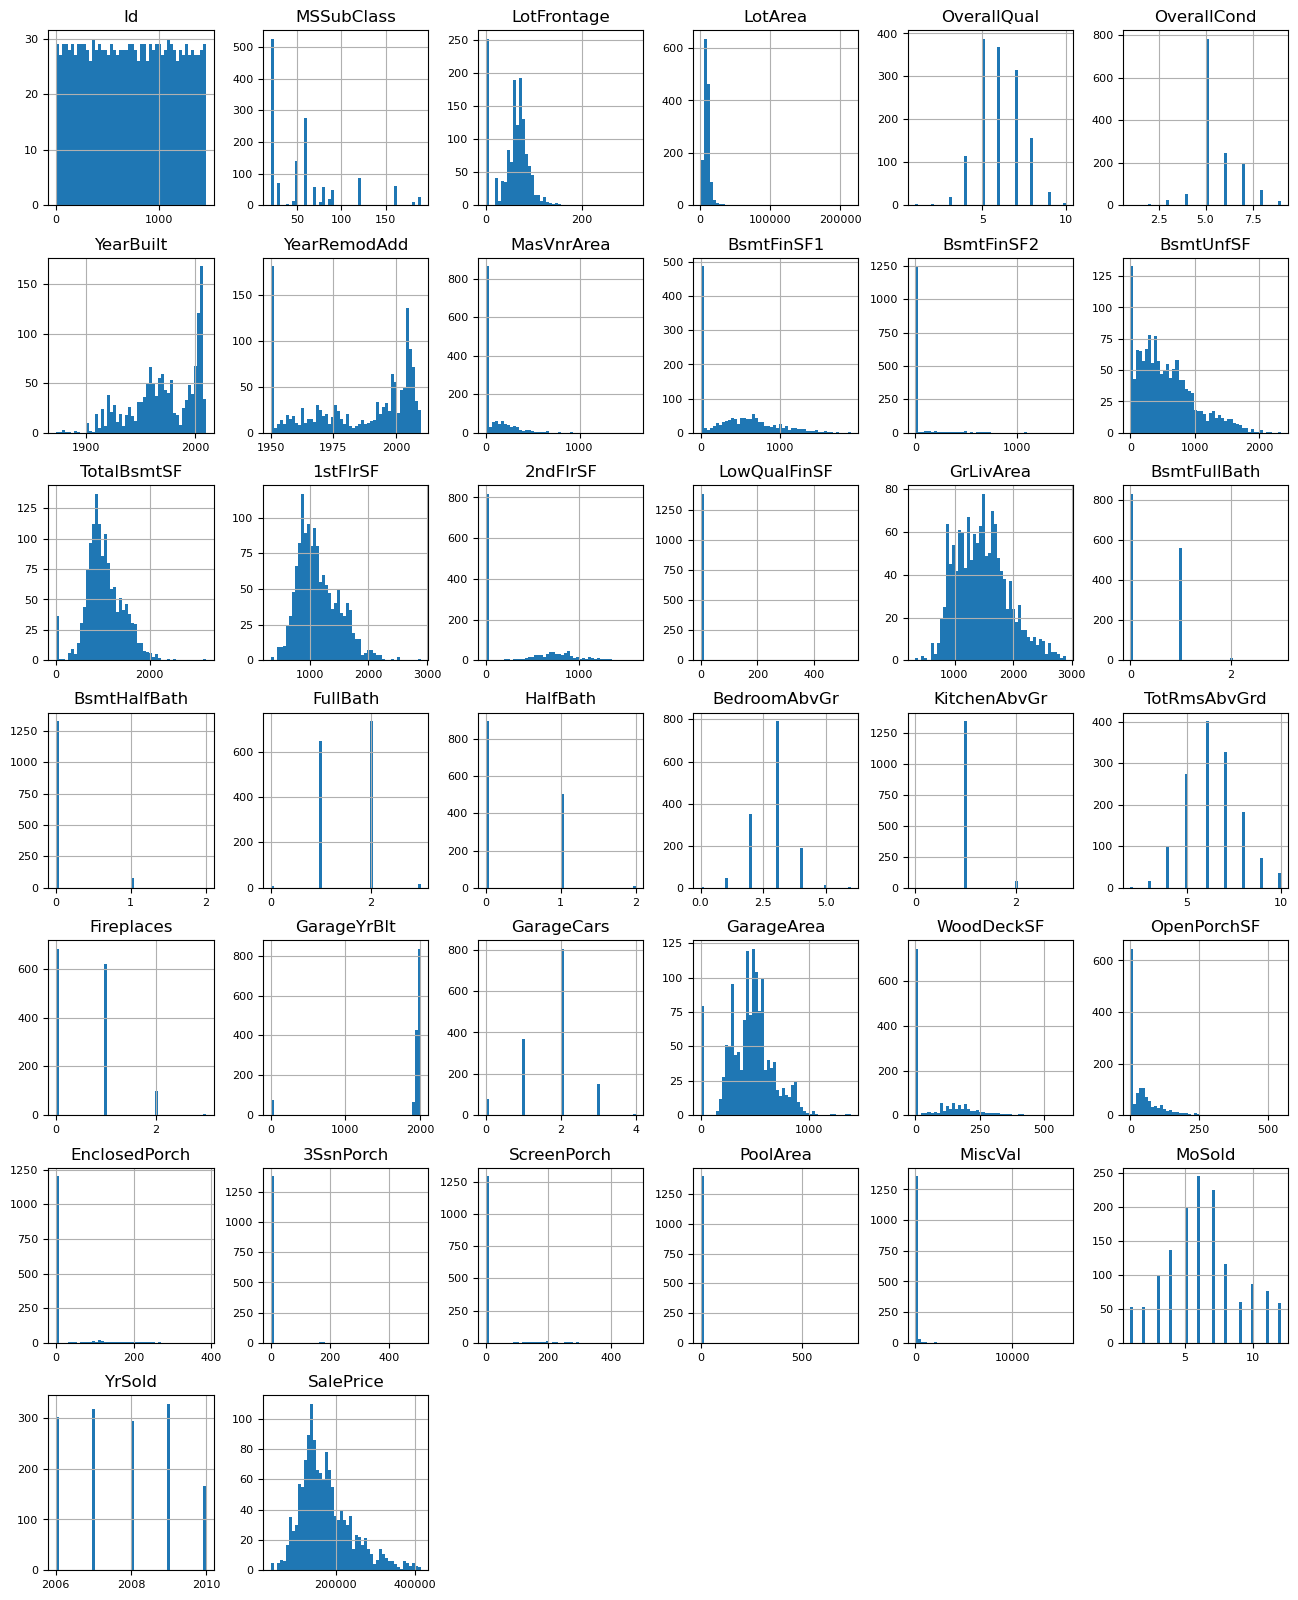

In [645]:
df_num = houses_train.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

## Feature engineering: 

- Feature scaling
- Aggregation
- One hot coding

-------------------

In [ ]:
categorical_features = houses_train.select_dtypes(include=object).columns
numeric_features = houses_train.select_dtypes(include=np.number).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [ ]:
houses_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NA,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NA,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500


In [ ]:
numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [ ]:
for i in categorical_features:
    print(houses_train[i].value_counts().sort_values())

MSZoning
C (all)      10
RH           15
FV           64
RM          212
RL         1105
Name: count, dtype: int64
Street
Grvl       5
Pave    1401
Name: count, dtype: int64
LotShape
IR3      9
IR2     36
IR1    460
Reg    901
Name: count, dtype: int64
LandContour
Low      35
HLS      46
Bnk      58
Lvl    1267
Name: count, dtype: int64
Utilities
NoSeWa       1
AllPub    1405
Name: count, dtype: int64
LotConfig
FR3           4
FR2          47
CulDSac      88
Corner      249
Inside     1018
Name: count, dtype: int64
LandSlope
Sev      12
Mod      61
Gtl    1333
Name: count, dtype: int64
Neighborhood
Blueste      2
NPkVill      9
Veenker     10
BrDale      16
MeadowV     16
Blmngtn     17
StoneBr     20
SWISU       23
ClearCr     27
NoRidge     34
Timber      37
IDOTRR      37
Crawfor     48
Mitchel     49
SawyerW     56
BrkSide     58
NridgHt     66
NWAmes      70
Sawyer      73
Gilbert     79
Somerst     84
Edwards     97
OldTown    108
CollgCr    149
NAmes      221
Name: count, dtype:

In [ ]:
counts = houses_train['SaleType'].value_counts()


houses_train = houses_train[houses_train['SaleType'].isin(counts[counts >3].index)]

In [ ]:
houses_train.shape

(1401, 77)

In [ ]:
#counts = houses_train['MiscFeature'].value_counts()
#houses_train = houses_train[houses_train['MiscFeature'].isin(counts[counts >3].index)]

In [ ]:
houses_train.shape

(1401, 77)

In [ ]:
counts = houses_train['GarageCond'].value_counts()


houses_train = houses_train[houses_train['GarageCond'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['Functional'].value_counts()


houses_train = houses_train[houses_train['Functional'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['Electrical'].value_counts()


houses_train = houses_train[houses_train['Electrical'].isin(counts[counts >3].index)]

In [ ]:
houses_train.shape

(1393, 77)

In [ ]:
counts = houses_train['HeatingQC'].value_counts()


houses_train = houses_train[houses_train['HeatingQC'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['Heating'].value_counts()


houses_train = houses_train[houses_train['Heating'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['BsmtCond'].value_counts()


houses_train = houses_train[houses_train['BsmtCond'].isin(counts[counts >3].index)]

In [ ]:
houses_train.shape

(1388, 77)

In [ ]:
counts = houses_train['Foundation'].value_counts()


houses_train = houses_train[houses_train['Foundation'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['ExterCond'].value_counts()


houses_train = houses_train[houses_train['ExterCond'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['Exterior2nd'].value_counts()


houses_train = houses_train[houses_train['Exterior2nd'].isin(counts[counts >3].index)]

In [ ]:
houses_train.shape

(1376, 77)

In [ ]:
counts = houses_train['Exterior1st'].value_counts()


houses_train = houses_train[houses_train['Exterior1st'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['RoofMatl'].value_counts()


houses_train = houses_train[houses_train['RoofMatl'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['RoofStyle'].value_counts()


houses_train = houses_train[houses_train['RoofStyle'].isin(counts[counts >3].index)]

In [ ]:
houses_train.shape

(1362, 77)

In [ ]:
counts = houses_train['HouseStyle'].value_counts()


houses_train = houses_train[houses_train['HouseStyle'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['Condition2'].value_counts()


houses_train = houses_train[houses_train['Condition2'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['Condition1'].value_counts()


houses_train = houses_train[houses_train['Condition1'].isin(counts[counts >3].index)]

In [ ]:
houses_train.shape

(1351, 77)

In [ ]:
counts = houses_train['Neighborhood'].value_counts()


houses_train = houses_train[houses_train['Neighborhood'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['Utilities'].value_counts()


houses_train = houses_train[houses_train['Utilities'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['GarageCond'].value_counts()


houses_train = houses_train[houses_train['GarageCond'].isin(counts[counts >3].index)]

In [ ]:
houses_train.shape

(1348, 77)

In [ ]:
categorical_features = houses_train.select_dtypes(include=object).columns
numeric_features = houses_train.select_dtypes(include=np.number).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [ ]:
# one hot coding for categorical_features
houses_train = pd.get_dummies(houses_train,columns=categorical_features)

#### 3. Feature selection


In [ ]:
houses_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1348, dtype: int64

In [ ]:
correlation = houses_train[numeric_features].corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.799452
GrLivArea        0.720702
GarageCars       0.654552
GarageArea       0.631680
TotalBsmtSF      0.621205
1stFlrSF         0.591059
YearBuilt        0.584384
FullBath         0.565076
YearRemodAdd     0.537994
TotRmsAbvGrd     0.515297
Fireplaces       0.449745
MasVnrArea       0.428870
BsmtFinSF1       0.347048
OpenPorchSF      0.332245
WoodDeckSF       0.317254
GarageYrBlt      0.290416
2ndFlrSF         0.275514
HalfBath         0.269136
LotArea          0.258844
BsmtUnfSF        0.228323
BsmtFullBath     0.221612
LotFrontage      0.200142
BedroomAbvGr     0.178669
ScreenPorch      0.096405
MoSold           0.093203
3SsnPorch        0.074080
PoolArea         0.027457
BsmtFinSF2      -0.008569
YrSold          -0.011095
MiscVal         -0.026261
BsmtHalfBath    -0.029834
Id              -0.030992
MSSubClass      -0.083712
LowQualFinSF    -0.086728
OverallCond     -0.109975
KitchenAbvGr    -0.135174
EnclosedPorch   -0.155826
Name: SalePr

In [ ]:
correlation = houses_train[numeric_features].corr()
correlation[abs(correlation['SalePrice']) > 0.2]['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.799452
GrLivArea       0.720702
GarageCars      0.654552
GarageArea      0.631680
TotalBsmtSF     0.621205
1stFlrSF        0.591059
YearBuilt       0.584384
FullBath        0.565076
YearRemodAdd    0.537994
TotRmsAbvGrd    0.515297
Fireplaces      0.449745
MasVnrArea      0.428870
BsmtFinSF1      0.347048
OpenPorchSF     0.332245
WoodDeckSF      0.317254
GarageYrBlt     0.290416
2ndFlrSF        0.275514
HalfBath        0.269136
LotArea         0.258844
BsmtUnfSF       0.228323
BsmtFullBath    0.221612
LotFrontage     0.200142
Name: SalePrice, dtype: float64

In [ ]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['SalePrice']) > threshold]['SalePrice'].index
selected_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'], dtype='object')

In [ ]:
df_houses_train = selected_features

In [ ]:
df_houses_train = houses_train[selected_features]
df_houses_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,8,0,2003.0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,6,1,1976.0,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,6,1,2001.0,2,608,0,42,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,7,1,1998.0,3,642,0,35,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,9,1,2000.0,3,836,192,84,250000


In [ ]:
df_houses_train.shape

(1348, 23)

## Model LR




### Prepare train and test data


In [687]:
# Prepare data
X = df_houses_train.drop(["SalePrice"], axis=1)
y = df_houses_train["SalePrice"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=99)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [688]:
X.shape

(1348, 22)

In [689]:
y.shape

(1348,)

### Build the model

In [690]:
# build the model
model = LinearRegression()


In [691]:
# Train the Model
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [692]:
# Test the Model
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)      # Linear regression model

In [693]:
# Interpretation of the Model
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients


In [694]:
coeff_df

,Coefficient
LotFrontage,3007.801708
LotArea,5993.362599
OverallQual,19796.292212
YearBuilt,8332.832881
YearRemodAdd,6686.981782
MasVnrArea,2364.457977
BsmtFinSF1,7230.481297
BsmtUnfSF,-1017.078792
TotalBsmtSF,7264.908287
1stFlrSF,7246.562952


In [695]:
print(f" Linear regression intercept: {model.intercept_}") 


 Linear regression intercept: 173582.8886827458


### Evaluating the Model


##### Mean Square Error

In [696]:
# Mean Square Error
y_base = [y_train.mean()] * len(y_test)
y_base


[173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868274583,
 173582.88868

In [697]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 4.949769e+09


In [698]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 5.590549e+08
Mean Squared Error for testing: 7.732915e+08



##### Mean Absolute Error


In [699]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 5.336680e+04


In [700]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 1.717167e+04
Mean Absolute Error for testing: 1.925323e+04


##### Root Mean Squared Error


In [701]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 7.035459e+04


In [702]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 2.364434e+04
Root Mean Squared Error for testing: 2.780812e+04


##### R Square


In [703]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.865943756083364
R Square for testing: 0.8422141246393278


#### Predictions vs. Real Values


In [704]:
predictions = model.predict(X_test_scaled)
predictions

array([202409.75074751, 122284.91126838,  97553.69622496, 158650.80756317,
       207363.60181023, 102931.13698875, 109670.73526223, 144924.91930187,
       180318.98275563, 110225.99762822,  81138.99557785, 128288.27835423,
       128040.1813167 , 198477.78618996, 144689.20770199, 143910.92972615,
       242597.98700422, 184139.46885628, 100245.36782747, 179127.15559994,
        83988.17078631, 130326.31841116, 271631.44725263, 194913.55526965,
       153568.48671406, 155825.28188224, 352760.35156063, 310504.02627065,
       237698.73487858, 198079.95758127, 251345.30126792, 251202.2317726 ,
       166381.25754125, 202156.10833928, 300267.44954806, 142474.94412061,
       129385.92347717, 197965.30483495, 255250.10259224, 196723.02803688,
       111221.07706142, 167056.00149255, 147305.44266533, 239070.13354215,
       301139.98968191, 191048.06628977, 138241.05911217, 204205.15946791,
       144308.37283592, 137260.15076536,  99495.44145797, 245528.43417412,
       264088.06596083, 1

In [705]:
Real_Values = np.array(y_test)
Real_Values

array([192000, 125000, 128000, 141000, 224000,  84500, 119000, 128000,
       181000, 117000,  79500, 127500, 142125, 195400, 143250, 122500,
       230000, 180000, 108000, 145000, 137500, 159434, 301000, 202500,
       150750, 145000, 412500, 325000, 200000, 250000, 286000, 264132,
       171900, 215000, 394617, 134450, 129000, 192000, 275000, 170000,
       120000, 155000, 117000, 220000, 341000, 137500, 120000, 234000,
       142500, 113000, 119000, 219500, 258000, 167900, 119000, 112500,
       135000, 148000, 254000, 152000,  80500, 135000, 188000, 240000,
        84500, 402861, 130500, 133900, 415298, 138887, 268000, 145000,
       167000, 118500, 171000, 137500, 182900, 107900, 223500, 181000,
       135000, 179000, 246578, 266500, 139000, 160000, 213490, 318000,
       116000, 175000, 159000, 230000, 194500, 137450, 209500, 141000,
       124000, 249700, 275000, 138500, 146000, 235000, 244000, 124500,
       115000, 392500, 147000,  91000, 128500, 125000,  66500, 156500,
      

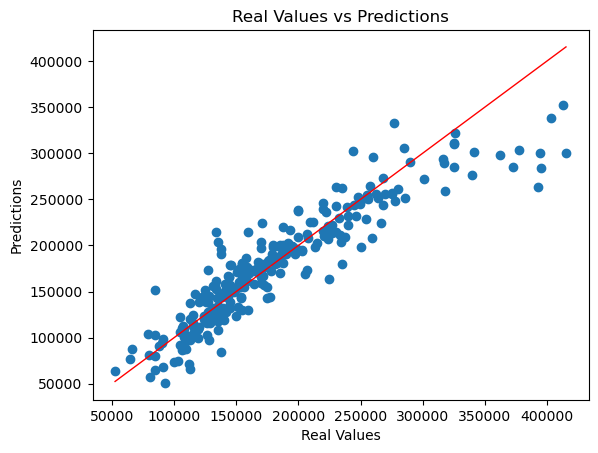

In [706]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

C:\Users\ish3e\AppData\Local\Temp\ipykernel_5384\2651291080.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution


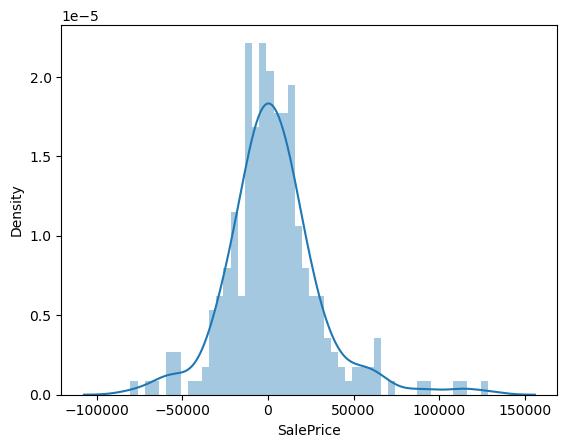

In [707]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution
